# EDA

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('../data/raw-dataset.csv')

In [10]:
df.head()

,id,rfid_tag,checkin_time,checkout_time,note,date
0,231966,6A3599CB,NaN,NaN,NaN,2025-12-11
1,231965,5AEC24CB,2025-12-10 21:54:41.57978+00,2025-12-11 04:12:48.000143+00,NaN,2025-12-11
2,231964,DAFD7CC0,NaN,NaN,NaN,2025-12-11
3,231963,4AECC6CB,NaN,NaN,NaN,2025-12-11
4,231962,6A48BDCB,NaN,NaN,NaN,2025-12-11


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183755 entries, 0 to 183754
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             183755 non-null  int64 
 1   rfid_tag       183755 non-null  object
 2   checkin_time   75502 non-null   object
 3   checkout_time  44666 non-null   object
 4   note           118278 non-null  object
 5   date           183755 non-null  object
dtypes: int64(1), object(5)
memory usage: 8.4+ MB


In [12]:
df.describe()

,id
count,183755.000000
mean,137604.980115
std,55326.955068
min,39976.000000
25%,90138.500000
50%,138444.000000
75%,185683.500000
max,231966.000000


## Analisis Distribusi Status Kehadiran (note)

In [13]:
# Melihat distribusi status kehadiran (note)
print("Distribusi status kehadiran:")
print(df['note'].value_counts(dropna=False))
print(f"\nPersentase:")
print(df['note'].value_counts(normalize=True, dropna=False) * 100)

Distribusi status kehadiran:
note
NaN      65477
alpa     55064
libur    52605
telat    10609
Name: count, dtype: int64

Persentase:
note
NaN      35.632772
alpa     29.965987
libur    28.627792
telat     5.773448
Name: proportion, dtype: float64


## Analisis Per Siswa (rfid_tag)

In [14]:
# Menghitung statistik kehadiran per siswa
# Note: NaN di 'note' diasumsikan sebagai hadir/normal, 'alpa' adalah tidak hadir

# Definisikan status: alpa = tidak hadir, lainnya = hadir (termasuk telat, sakit, izin)
df['is_alpa'] = df['note'].str.lower() == 'alpa'
df['is_hadir'] = df['checkin_time'].notna()  # Hadir jika ada checkin

# Statistik per siswa
student_stats = df.groupby('rfid_tag').agg(
    total_records=('id', 'count'),
    total_hadir=('is_hadir', 'sum'),
    total_alpa=('is_alpa', 'sum'),
    total_telat=('note', lambda x: (x.str.lower() == 'telat').sum())
).reset_index()

# Hitung persentase kehadiran dan alpa
student_stats['pct_hadir'] = (student_stats['total_hadir'] / student_stats['total_records'] * 100).round(2)
student_stats['pct_alpa'] = (student_stats['total_alpa'] / student_stats['total_records'] * 100).round(2)

print(f"Total siswa unik: {len(student_stats)}")
student_stats.head(10)

Total siswa unik: 1491


,rfid_tag,total_records,total_hadir,total_alpa,total_telat,pct_hadir,pct_alpa
0,1418C9BC,93,58,8,22,62.37,8.60
1,144866BC,93,49,17,17,52.69,18.28
2,147737BC,66,28,20,5,42.42,30.30
3,148493BC,93,33,33,11,35.48,35.48
4,149E28BC,66,28,20,4,42.42,30.30
5,14A2BBC,66,31,17,4,46.97,25.76
6,14ACAFBC,66,41,7,3,62.12,10.61
7,14B88EBC,93,46,21,3,49.46,22.58
8,14BBFBC,66,31,17,1,46.97,25.76
9,14C1CBBC,93,48,19,2,51.61,20.43


In [15]:
# Statistik deskriptif kehadiran siswa
print("Statistik kehadiran siswa:")
print(student_stats[['total_records', 'total_hadir', 'total_alpa', 'pct_hadir', 'pct_alpa']].describe())

Statistik kehadiran siswa:
       total_records  total_hadir   total_alpa    pct_hadir     pct_alpa
count    1491.000000  1491.000000  1491.000000  1491.000000  1491.000000
mean      123.242790    50.638498    36.930919    41.024474    30.131952
std        20.522669    19.701636    18.712231    14.768230    14.481815
min         4.000000     0.000000     0.000000     0.000000     0.000000
25%       129.000000    39.000000    23.000000    32.945000    18.600000
50%       129.000000    56.000000    33.000000    44.960000    26.360000
75%       129.000000    66.000000    47.000000    52.315000    37.980000
max       129.000000    79.000000    91.000000   100.000000    70.540000


## Identifikasi Outlier: Siswa dengan Kehadiran Rendah

In [16]:
# Siswa dengan persentase alpa tinggi (>= 50%)
high_alpa_students = student_stats[student_stats['pct_alpa'] >= 50].sort_values('pct_alpa', ascending=False)
print(f"Siswa dengan alpa >= 50%: {len(high_alpa_students)} siswa")
high_alpa_students.head(20)

Siswa dengan alpa >= 50%: 182 siswa


,rfid_tag,total_records,total_hadir,total_alpa,total_telat,pct_hadir,pct_alpa
908,AB56389D,129,0,91,0,0.00,70.54
145,2B604A9D,129,0,91,0,0.00,70.54
515,6B23259D,129,0,91,0,0.00,70.54
1473,FBCA119D,129,0,91,0,0.00,70.54
612,7B2F1C9D,129,0,91,0,0.00,70.54
1425,FB3F469D,129,0,91,0,0.00,70.54
1352,EB8A2E9D,129,0,91,0,0.00,70.54
1311,EB242E9D,129,0,91,0,0.00,70.54
655,7BAD419D,129,0,91,0,0.00,70.54
856,9BD3419D,129,0,91,0,0.00,70.54


In [17]:
# Siswa yang hampir tidak pernah hadir (kehadiran <= 10%)
rarely_attend = student_stats[student_stats['pct_hadir'] <= 10].sort_values('pct_hadir')
print(f"Siswa dengan kehadiran <= 10%: {len(rarely_attend)} siswa")
rarely_attend

Siswa dengan kehadiran <= 10%: 63 siswa


,rfid_tag,total_records,total_hadir,total_alpa,total_telat,pct_hadir,pct_alpa
1490,RFIDFR2,121,0,85,0,0.0,70.25
515,6B23259D,129,0,91,0,0.0,70.54
612,7B2F1C9D,129,0,91,0,0.0,70.54
922,AB753E9D,129,0,91,0,0.0,70.54
655,7BAD419D,129,0,91,0,0.0,70.54
...,...,...,...,...,...,...,...
499,69AD43A6,93,8,59,5,8.6,63.44
988,B5A489D,129,12,80,3,9.3,62.02
349,4BAE319D,129,12,79,8,9.3,61.24
42,1B4A79D,129,12,79,1,9.3,61.24


In [18]:
# Siswa yang 100% alpa (tidak pernah hadir sama sekali)
never_attend = student_stats[student_stats['pct_hadir'] == 0]
print(f"Siswa yang tidak pernah hadir (0% kehadiran): {len(never_attend)} siswa")
never_attend

Siswa yang tidak pernah hadir (0% kehadiran): 15 siswa


,rfid_tag,total_records,total_hadir,total_alpa,total_telat,pct_hadir,pct_alpa
143,2B58469D,129,0,91,0,0.0,70.54
145,2B604A9D,129,0,91,0,0.0,70.54
515,6B23259D,129,0,91,0,0.0,70.54
612,7B2F1C9D,129,0,91,0,0.0,70.54
655,7BAD419D,129,0,91,0,0.0,70.54
856,9BD3419D,129,0,91,0,0.0,70.54
879,A98B412,129,0,91,0,0.0,70.54
908,AB56389D,129,0,91,0,0.0,70.54
922,AB753E9D,129,0,91,0,0.0,70.54
979,B3A439D,129,0,91,0,0.0,70.54


## Visualisasi Distribusi Kehadiran Siswa

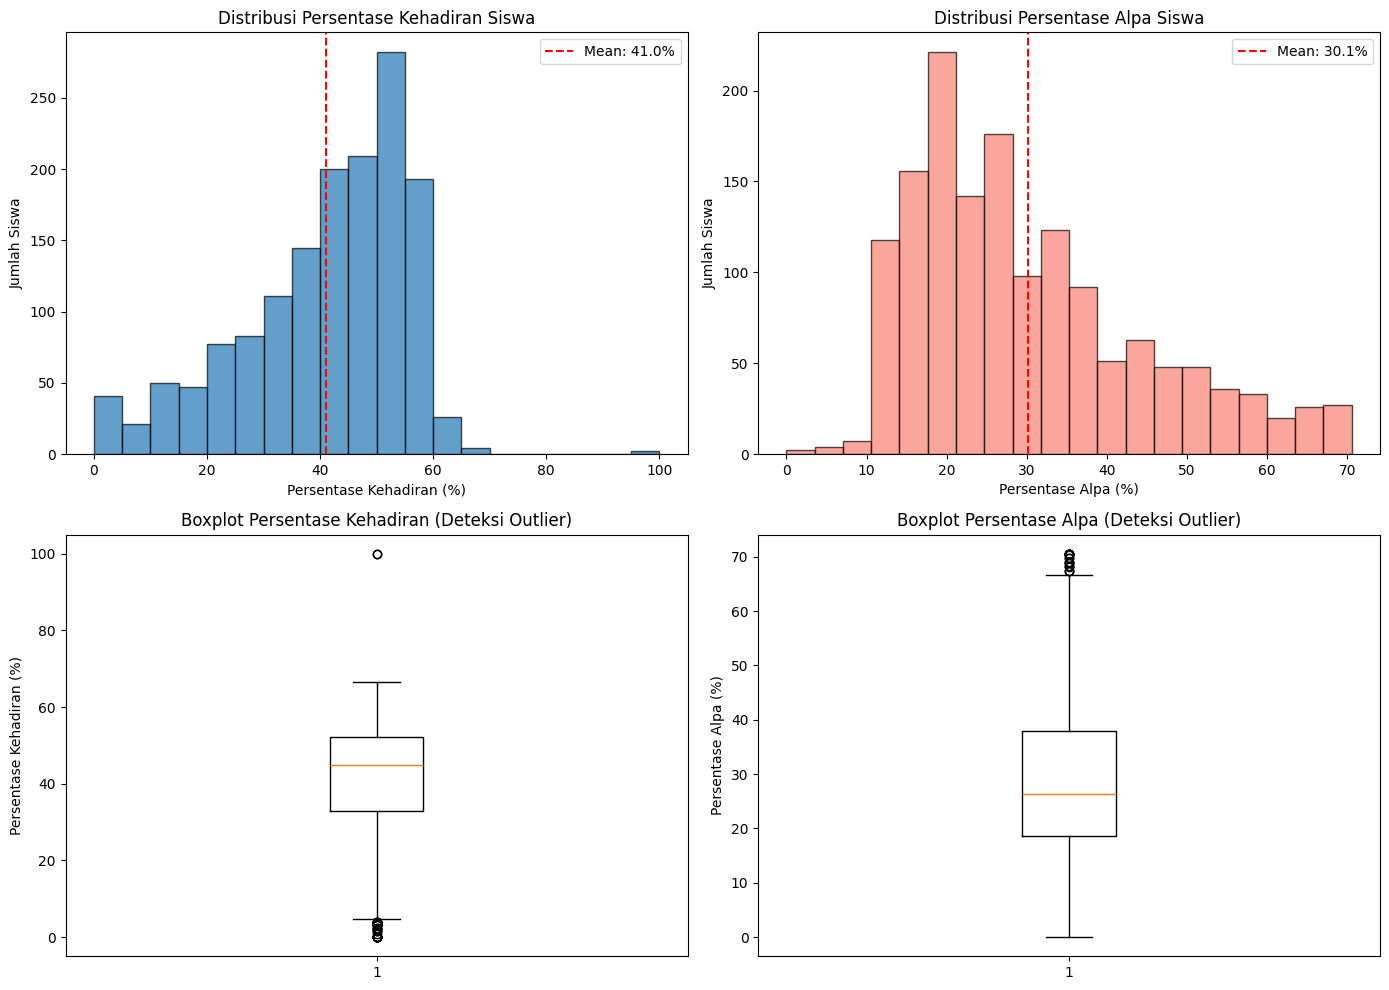

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram persentase kehadiran
axes[0, 0].hist(student_stats['pct_hadir'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(x=student_stats['pct_hadir'].mean(), color='red', linestyle='--', label=f'Mean: {student_stats["pct_hadir"].mean():.1f}%')
axes[0, 0].set_xlabel('Persentase Kehadiran (%)')
axes[0, 0].set_ylabel('Jumlah Siswa')
axes[0, 0].set_title('Distribusi Persentase Kehadiran Siswa')
axes[0, 0].legend()

# 2. Histogram persentase alpa
axes[0, 1].hist(student_stats['pct_alpa'], bins=20, edgecolor='black', alpha=0.7, color='salmon')
axes[0, 1].axvline(x=student_stats['pct_alpa'].mean(), color='red', linestyle='--', label=f'Mean: {student_stats["pct_alpa"].mean():.1f}%')
axes[0, 1].set_xlabel('Persentase Alpa (%)')
axes[0, 1].set_ylabel('Jumlah Siswa')
axes[0, 1].set_title('Distribusi Persentase Alpa Siswa')
axes[0, 1].legend()

# 3. Boxplot kehadiran
axes[1, 0].boxplot(student_stats['pct_hadir'], vert=True)
axes[1, 0].set_ylabel('Persentase Kehadiran (%)')
axes[1, 0].set_title('Boxplot Persentase Kehadiran (Deteksi Outlier)')

# 4. Boxplot alpa
axes[1, 1].boxplot(student_stats['pct_alpa'], vert=True)
axes[1, 1].set_ylabel('Persentase Alpa (%)')
axes[1, 1].set_title('Boxplot Persentase Alpa (Deteksi Outlier)')

plt.tight_layout()
plt.show()

## Deteksi Outlier dengan IQR Method

In [20]:
# Deteksi outlier menggunakan IQR method untuk persentase kehadiran
Q1_hadir = student_stats['pct_hadir'].quantile(0.25)
Q3_hadir = student_stats['pct_hadir'].quantile(0.75)
IQR_hadir = Q3_hadir - Q1_hadir

lower_bound_hadir = Q1_hadir - 1.5 * IQR_hadir
upper_bound_hadir = Q3_hadir + 1.5 * IQR_hadir

print(f"IQR Analysis - Persentase Kehadiran:")
print(f"  Q1: {Q1_hadir:.2f}%")
print(f"  Q3: {Q3_hadir:.2f}%")
print(f"  IQR: {IQR_hadir:.2f}")
print(f"  Lower Bound: {lower_bound_hadir:.2f}%")
print(f"  Upper Bound: {upper_bound_hadir:.2f}%")

# Siswa outlier (kehadiran rendah)
outlier_low_attendance = student_stats[student_stats['pct_hadir'] < lower_bound_hadir]
print(f"\nSiswa dengan kehadiran outlier rendah (<{lower_bound_hadir:.2f}%): {len(outlier_low_attendance)} siswa")

IQR Analysis - Persentase Kehadiran:
  Q1: 32.95%
  Q3: 52.31%
  IQR: 19.37
  Lower Bound: 3.89%
  Upper Bound: 81.37%

Siswa dengan kehadiran outlier rendah (<3.89%): 39 siswa


In [21]:
# Tampilkan detail siswa outlier
outlier_low_attendance.sort_values('pct_hadir')

,rfid_tag,total_records,total_hadir,total_alpa,total_telat,pct_hadir,pct_alpa
1490,RFIDFR2,121,0,85,0,0.00,70.25
979,B3A439D,129,0,91,0,0.00,70.54
655,7BAD419D,129,0,91,0,0.00,70.54
612,7B2F1C9D,129,0,91,0,0.00,70.54
1473,FBCA119D,129,0,91,0,0.00,70.54
515,6B23259D,129,0,91,0,0.00,70.54
908,AB56389D,129,0,91,0,0.00,70.54
879,A98B412,129,0,91,0,0.00,70.54
1311,EB242E9D,129,0,91,0,0.00,70.54
145,2B604A9D,129,0,91,0,0.00,70.54


## Ringkasan Kategori Kehadiran Siswa

In [22]:
# Kategorisasi siswa berdasarkan tingkat kehadiran
def categorize_attendance(pct):
    if pct == 0:
        return '0. Tidak Pernah Hadir (0%)'
    elif pct <= 25:
        return '1. Sangat Jarang (1-25%)'
    elif pct <= 50:
        return '2. Jarang (26-50%)'
    elif pct <= 75:
        return '3. Cukup (51-75%)'
    else:
        return '4. Baik (>75%)'

student_stats['kategori_kehadiran'] = student_stats['pct_hadir'].apply(categorize_attendance)

# Ringkasan per kategori
kategori_summary = student_stats['kategori_kehadiran'].value_counts().sort_index()
print("Distribusi Siswa per Kategori Kehadiran:")
print(kategori_summary)
print(f"\nPersentase:")
print((kategori_summary / len(student_stats) * 100).round(2))

Distribusi Siswa per Kategori Kehadiran:
kategori_kehadiran
0. Tidak Pernah Hadir (0%)     15
1. Sangat Jarang (1-25%)      227
2. Jarang (26-50%)            744
3. Cukup (51-75%)             503
4. Baik (>75%)                  2
Name: count, dtype: int64

Persentase:
kategori_kehadiran
0. Tidak Pernah Hadir (0%)     1.01
1. Sangat Jarang (1-25%)      15.22
2. Jarang (26-50%)            49.90
3. Cukup (51-75%)             33.74
4. Baik (>75%)                 0.13
Name: count, dtype: float64


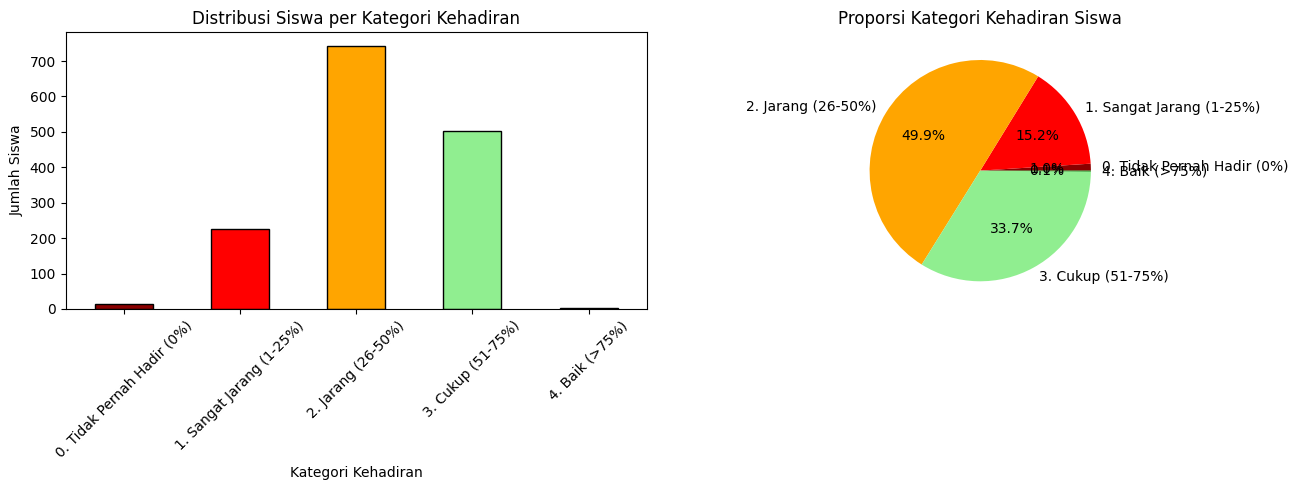

In [23]:
# Visualisasi kategori kehadiran
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
kategori_summary.plot(kind='bar', ax=axes[0], color=['darkred', 'red', 'orange', 'lightgreen', 'green'], edgecolor='black')
axes[0].set_xlabel('Kategori Kehadiran')
axes[0].set_ylabel('Jumlah Siswa')
axes[0].set_title('Distribusi Siswa per Kategori Kehadiran')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(kategori_summary.values, labels=kategori_summary.index, autopct='%1.1f%%', 
            colors=['darkred', 'red', 'orange', 'lightgreen', 'green'])
axes[1].set_title('Proporsi Kategori Kehadiran Siswa')

plt.tight_layout()
plt.show()

## Daftar Siswa Outlier (Perlu Perhatian Khusus)

In [26]:
# Gabungkan semua siswa bermasalah (kehadiran <= 10%)
problematic_students = student_stats[student_stats['pct_hadir'] <= 10].sort_values('pct_hadir')

print(f"Total siswa dengan kehadiran <= 10%: {len(problematic_students)} dari {len(student_stats)} siswa")
print(f"Persentase: {len(problematic_students) / len(student_stats) * 100:.2f}%\n")

# Tampilkan tabel
problematic_students[['rfid_tag', 'total_records', 'total_hadir', 'total_alpa', 'pct_hadir', 'pct_alpa', 'kategori_kehadiran']]

Total siswa dengan kehadiran <= 10%: 63 dari 1491 siswa
Persentase: 4.23%



,rfid_tag,total_records,total_hadir,total_alpa,pct_hadir,pct_alpa,kategori_kehadiran
1490,RFIDFR2,121,0,85,0.0,70.25,0. Tidak Pernah Hadir (0%)
515,6B23259D,129,0,91,0.0,70.54,0. Tidak Pernah Hadir (0%)
612,7B2F1C9D,129,0,91,0.0,70.54,0. Tidak Pernah Hadir (0%)
922,AB753E9D,129,0,91,0.0,70.54,0. Tidak Pernah Hadir (0%)
655,7BAD419D,129,0,91,0.0,70.54,0. Tidak Pernah Hadir (0%)
...,...,...,...,...,...,...,...
499,69AD43A6,93,8,59,8.6,63.44,1. Sangat Jarang (1-25%)
988,B5A489D,129,12,80,9.3,62.02,1. Sangat Jarang (1-25%)
349,4BAE319D,129,12,79,9.3,61.24,1. Sangat Jarang (1-25%)
42,1B4A79D,129,12,79,9.3,61.24,1. Sangat Jarang (1-25%)


In [27]:
# Simpan daftar siswa outlier untuk referensi
outlier_rfid_tags = problematic_students['rfid_tag'].tolist()
print(f"RFID Tag siswa outlier ({len(outlier_rfid_tags)} siswa):")
print(outlier_rfid_tags)

RFID Tag siswa outlier (63 siswa):
['RFIDFR2', '6B23259D', '7B2F1C9D', 'AB753E9D', '7BAD419D', '9BD3419D', 'AB56389D', 'B3A439D', 'EB8A2E9D', '2B604A9D', '2B58469D', 'A98B412', 'FB3F469D', 'FBCA119D', 'EB242E9D', 'CB8F3C9D', 'D44AFBBB', '4B56499D', 'DB843D9D', '65CB46BF', 'C9329A5', '4BF9129D', 'DBFFA9D', 'A8A01FD2', 'AB66179D', '9BADF9D', 'BB6CA9D', '7586E6BF', 'C9426BA5', '85ADFEBC', '9469C7BC', '958FA8BC', '285D2D3', 'A533B3BC', 'AB3B499D', '1B29409D', '8B9129D', '1BD5279D', '3BF049D', 'AB13A9D', 'ABC1299D', '9BCC139D', 'FB4A479D', '5B88A9D', '7B8B1B9D', '9BAF349D', 'BB1E129D', '5B6D299D', '8B214A9D', 'RFIDFR1', '9BFB3B9D', '5B802A9D', '3B7C359D', '3AC8EC3', '3BD0379D', '5BA6379D', 'CBC6349D', 'AB7A319D', '69AD43A6', 'B5A489D', '4BAE319D', '1B4A79D', '84C26BC']
